# Implement Linear Regression

This will be helpful to further familiarize yourself with Numpy and how Linear Regression actually works.
If you face any problems, feel free to contact us in Slack

In [287]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt  
import seaborn as sns

### Load the boston house dataset

In [288]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['PRICE'] = boston_dataset.target 
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


<AxesSubplot:>

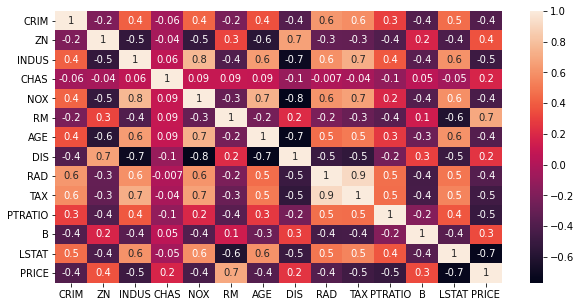

In [289]:
# Code here
plt.figure(figsize = (10,5))
sns.heatmap(boston.corr(), annot = True, fmt='.1g')

### Train test split

In [290]:
X = boston.drop(['PRICE'], axis = 1)
y = boston['PRICE']
X.shape

(506, 13)

In [291]:
# Code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### Apply feature scaling on the data

In [292]:

features = X_train.columns
for feature in features:
        minimum = min(X_train[feature])
        maximum = max(X_train[feature])
        X_train[feature] = (X_train[feature] -minimum) / (maximum - minimum)
X_train.columns.shape


(13,)

### Define the Parameters (W or Θ) here
Create an appropriate shape numpy array for W

In [293]:
w = np.zeros(X_train.shape[1])
learning_rate =  0.001
w.shape

(13,)

# Linear regression: Using normal equation
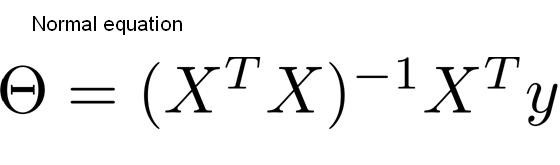

In [294]:
# Solve using normal equation
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
w

array([-10.55740048,   4.88078555,   3.11131809,   4.21581208,
        -1.64375475,  32.76413246,   2.06795652,  -4.52486169,
         6.62351659,  -6.89373491,  -3.73569127,   9.81939255,
       -11.22430368])

### Get predictions

In [295]:
def predict(X, w):
    # Implement Linear Regession Equation here
    return np.dot(X, w)

### Define the MSE loss function
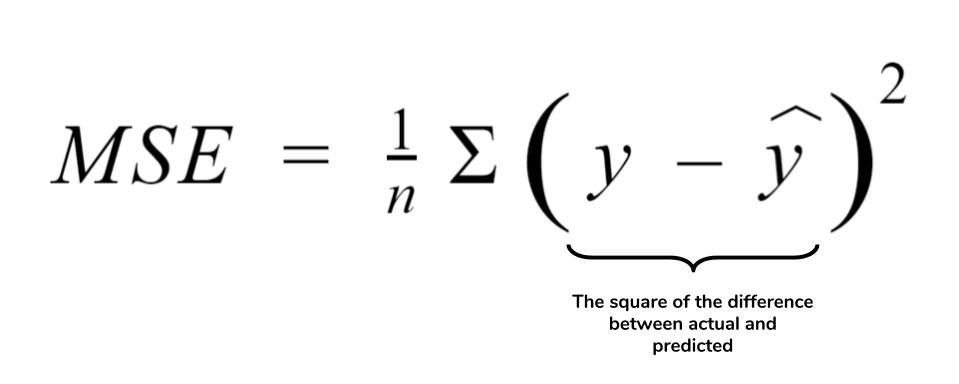

In [296]:
# Code here
def cost_function(y, yhat):
    m = y.shape[0]

    sq_err = (y-yhat)**2

    J = (1/(2*m)) * sq_err.sum()
    # Return average squared error among predictions
    return J

In [297]:
yhat = predict(X_train, w)
print(yhat)

[23.57393393 17.34455265 25.13525953 14.39693608 41.22651192 15.2947193
 42.79521067 15.24506151 21.3813465  42.86170214 32.21927444 14.67292153
 12.35148162 23.59698063 22.42270975 22.38689973 15.74843804 25.42993123
 23.28810265 25.6806942  19.03913438 17.85371313 15.51970286 17.64385546
 20.8816091  17.4380922  13.09018893 41.0457856  22.20023231  9.51282755
 17.52267178 21.70900941 24.81279551 24.21952756 23.25537024 17.05661464
 22.08439312  9.07538192 13.25120366  6.30528353 19.14235617 19.40773213
 30.40939416  9.27878848 15.26308318 -7.87444342 31.0576959   9.64753318
 11.42706031 23.7002567  22.41971836 15.44694579 25.97786614 20.32709902
 26.10581971 23.62227872 23.53212094 26.72291811 26.13012846 18.98860333
 10.78833213 21.74752335 27.41690848 29.87343802 16.18634589 19.16174853
 17.39381144 15.92409683 20.80773416 23.03917395 18.29036509 36.47027134
 17.73049815 21.00600932 10.78969949 23.31942937 19.32320723 30.92680749
 36.27364035 31.81608721 22.86560414 20.1581317   0.

In [298]:
loss = cost_function(y_train, yhat)
print(loss)

12.45673902158465


# Solve using Gradient Descent

### Calculate gradient

In [309]:
def compute_gradient(X, y,yhat):
    # Code here
    m = y.shape[0]
    dyhat = (1/m) * (yhat - y)
    dw = np.dot(X.T, dyhat)
    return dw

### Update Weights

In [310]:
# Code here
w = w - learning_rate*compute_gradient(X_train, y_train,yhat)

ValueError: operands could not be broadcast together with shapes (506,) (354,) 

### Repeat for N- Iterations

In [301]:
N = 1000
losses = []
for i in range(N):
    # Predict
    yhat = predict(X, W)
    
    # Calculate Loss
    loss = mse(y, yhat)
    
    # Compute gradient dL/dW
    dW = compute_gradient(X, y, W)
    
    # Update the weights
    W = W - alpha*compute_gradient(X, y, W)
    
    losses.append(loss)

TypeError: mse() missing 1 required positional argument: 'W'

### Plot the loss curve

In [302]:
# Loss curve here

# BONUS: Create a Linear Regression Class [OPTIONAL]
Create a Sklearn-like API

In [303]:
class LinearRegression:
    # You can define additional functions as per your need
    def __init__(self, alpha=0.001, n_iter=1000):
        self.W = None
        self.alpha = alpha
        self.n_iter = n_iter
        ...

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

In [304]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
loss = mse(y, predictions)

TypeError: mse() missing 1 required positional argument: 'W'

### Compare loss with Sklearn's implementation

In [305]:
from sklearn.linear_model import LinearRegression as SKLinearRegression

In [306]:
sklearn_model = SKLinearRegression()
sklearn_model.fit(X, y)
sklearn_predictions = sklearn_model.predict(X)
sklearn_loss = mse(y, sklearn_predictions)

TypeError: mse() missing 1 required positional argument: 'W'

In [307]:
print(f"Sklearn: {sklearn_loss}")
print(f"Ours: {loss}")

NameError: name 'sklearn_loss' is not defined